In [1]:
import numpy as np   
from sklearn.linear_model import LinearRegression
from scipy import stats 
from scipy.stats import zscore
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd    
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
sns.set(color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
df1=pd.read_json ('Part1 - Car-Attributes.json')
df2=pd.read_csv('Part1 - Car name.csv')
df=pd.concat([df1,df2],axis=1)
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
df.shape

(398, 9)

In [4]:
df.isnull().any()

mpg         False
cyl         False
disp        False
hp          False
wt          False
acc         False
yr          False
origin      False
car_name    False
dtype: bool

There are no null values in 9 columns and 398 rows

In [5]:
# save this data as to csv,xlsx and json
df.to_csv('mpg.csv', index=False)
df.to_excel('mpg.xlsx', index = False)
df.to_json('mpg.json', orient = 'split', compression = 'infer')

In [6]:
dfcsv = pd.read_csv('mpg.csv')

In [7]:
dfcsv.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [8]:
df.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_name  398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


hp(Hosrsepower) is of type object which is suppose to be of type float64. Before converting it we need check if all values are convertable.

In [10]:
hpIsDigit = pd.DataFrame(df.hp.str.isdigit()) 

In [11]:
df[hpIsDigit['hp'] == False].count()

mpg         6
cyl         6
disp        6
hp          6
wt          6
acc         6
yr          6
origin      6
car_name    6
dtype: int64

We can see that there are 6 rows in hp which are not digits, we need to replace those with null values so that we can convert column to float64 type.

In [12]:
df = df.replace('?', np.nan)
df[hpIsDigit['hp'] == False]

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl


In [14]:
df['hp'].fillna((df['hp'].median()), inplace=True)

In [15]:
df.describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    float64
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_name  398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [17]:
df.isnull().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_name    0
dtype: int64

So there are no null values now.

We can choose few features and drop if we feel that they are irrelevant

In [18]:
dfnew=df.drop('car_name',axis=1)

In [19]:
dfnew.describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [20]:
df_cat = df.iloc[:,[1,6,7]]

In [21]:
df_num = df.iloc[:,[0,2,3,4,5]]

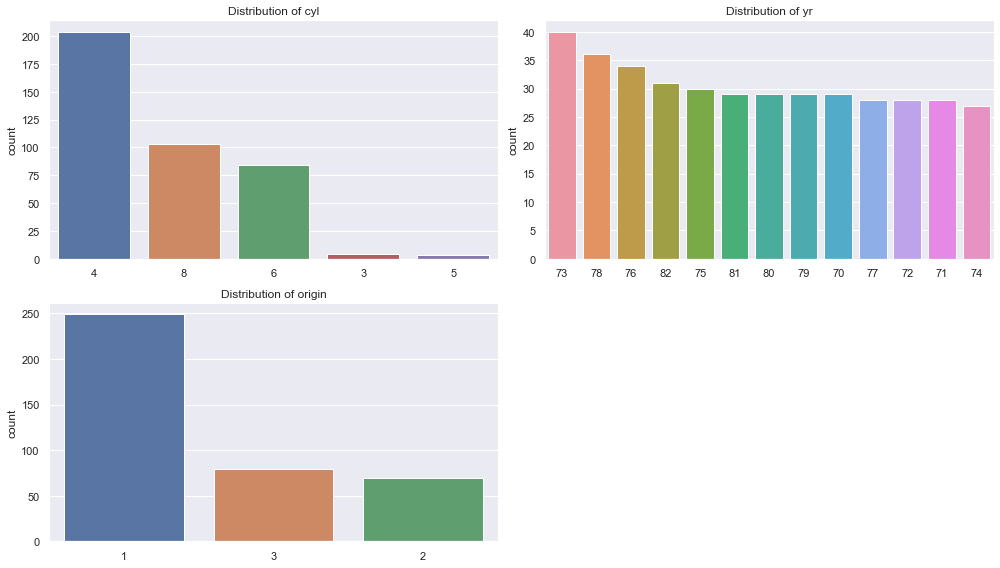

In [22]:
fig = plt.figure(1, (14, 8))

for i,df in enumerate(df_cat.columns):
    ax = plt.subplot(2,2,i+1)
    sns.countplot(df_cat[df], order=df_cat[df].value_counts().index)
    ax.set_xlabel(None)
    ax.set_title(f'Distribution of {df}')
    plt.tight_layout()

plt.show()

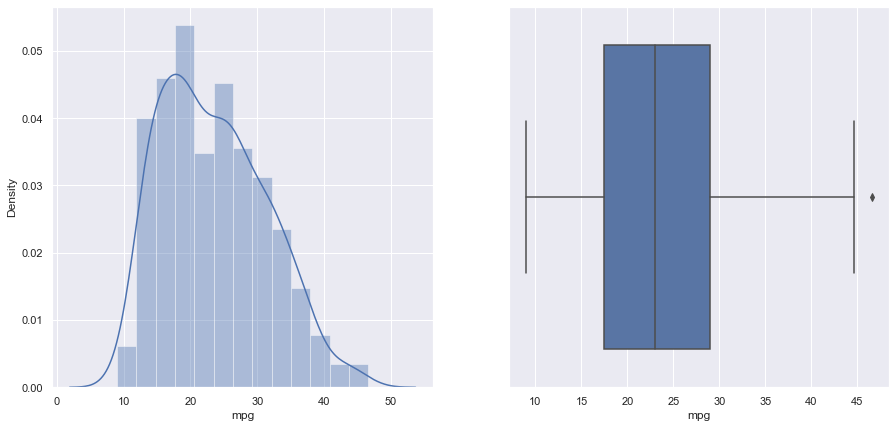

In [23]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x = 'mpg', data=dfnew , ax=axes[1])
sns.distplot(dfnew['mpg'],  ax=axes[0])
plt.show()

mpg seems to be normally distributed apart from 1 outlier which makes this slightly right sckewed.

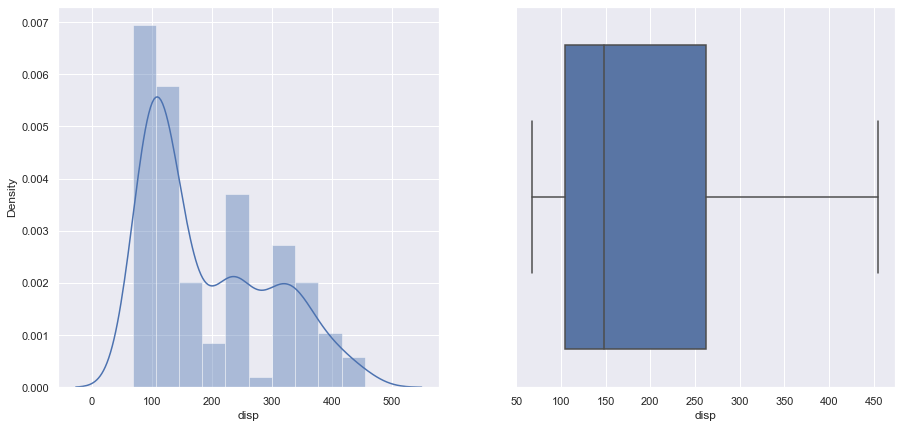

In [24]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x = 'disp', data=dfnew , ax=axes[1])
sns.distplot(dfnew['disp'],  ax=axes[0])
plt.show()

disp does not have any outliers but it is slightly right sckewed.

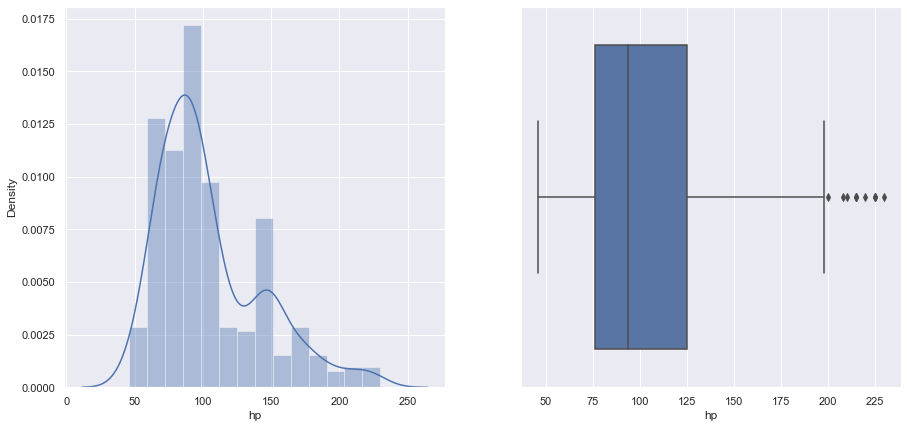

In [25]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x = 'hp', data=dfnew , ax=axes[1])
sns.distplot(dfnew['hp'],  ax=axes[0])
plt.show()

hp has multiple outliers and it is right sckewed

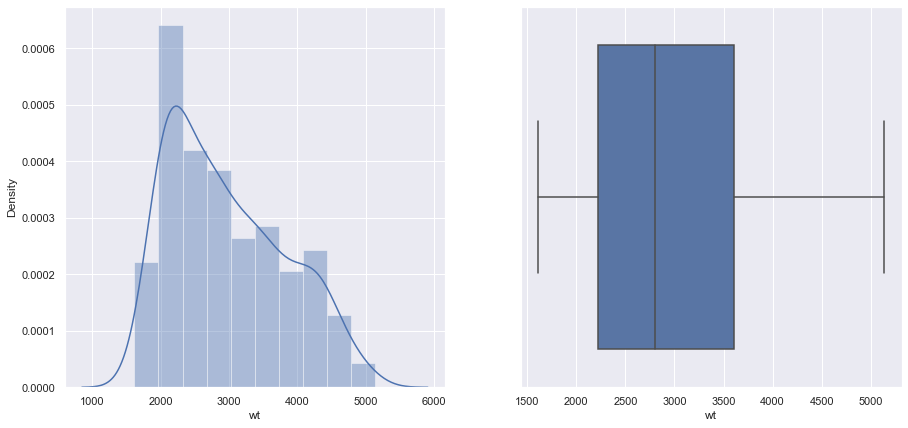

In [26]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x = 'wt', data=dfnew , ax=axes[1])
sns.distplot(dfnew['wt'],  ax=axes[0])
plt.show()

wt has no outliers, slightly right sckewed

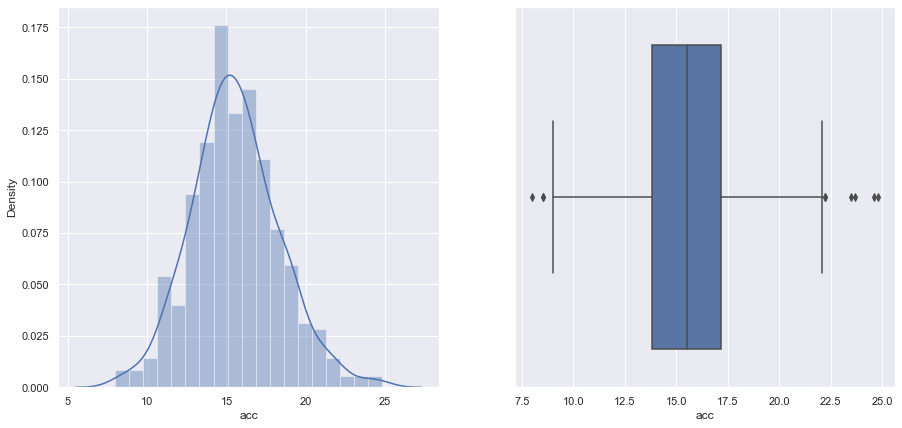

In [27]:
f, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x = 'acc', data=dfnew , ax=axes[1])
sns.distplot(dfnew['acc'],  ax=axes[0])
plt.show()

acc has outliers on both sides. If we leave out the outliers, we will have a normal distribution.

In [28]:
dfnew['mpg_level'] = dfnew['mpg'].apply(lambda x: 'low' if x<15 else 'high' if x>29 else 'medium')

In [29]:
dfnew = pd.get_dummies(dfnew, columns=['origin'])
dfnew = pd.get_dummies(dfnew, columns=['mpg_level'])

In [30]:
dfcopy = dfnew.copy()

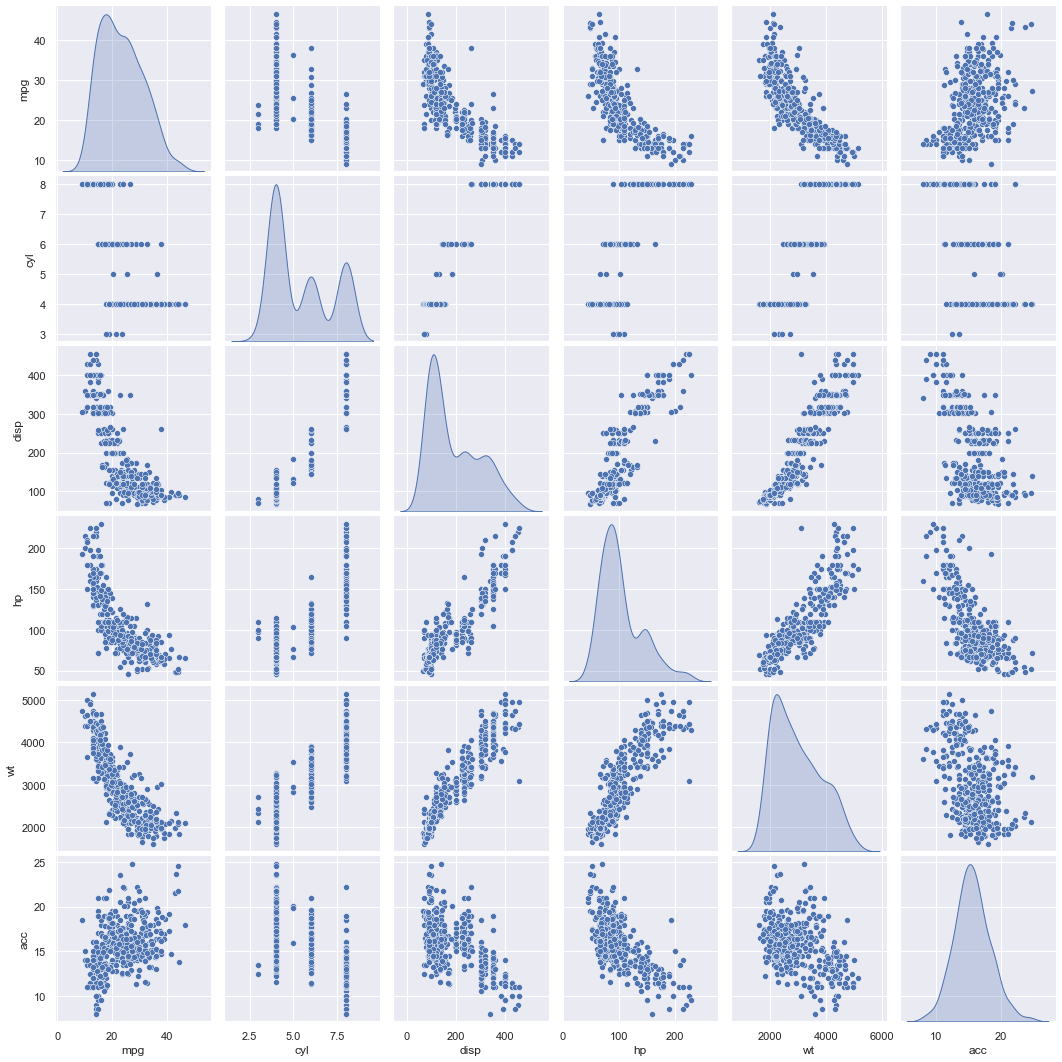

In [31]:
sns.pairplot(dfnew.iloc[:,0:6], diag_kind='kde')

It appears that there is linear relationship between wt and disp,wt and hp, disp and hp, etc.

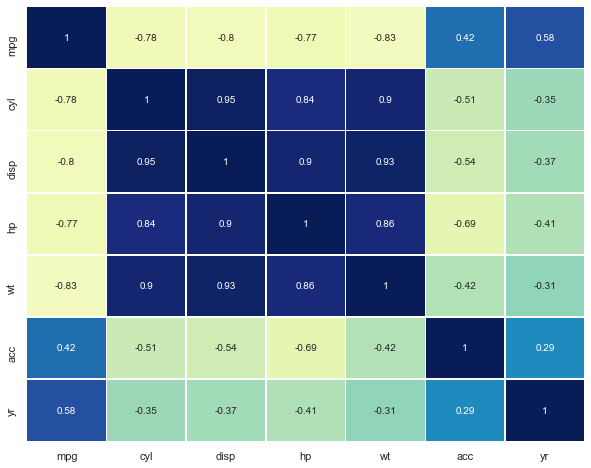

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(dfnew.iloc[:,0:7].corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

It seems all variables are correlated with each other apart from yr.

In [33]:
dfnew.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin_1,origin_2,origin_3,mpg_level_high,mpg_level_low,mpg_level_medium
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0,0,0,1


In [34]:
dfnew.drop(['origin_3','mpg_level_low'], axis=1)

,mpg,cyl,disp,hp,wt,acc,yr,origin_1,origin_2,mpg_level_high,mpg_level_medium
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,0,0,1
394,44.0,4,97.0,52.0,2130,24.6,82,0,1,1,0
395,32.0,4,135.0,84.0,2295,11.6,82,1,0,1,0
396,28.0,4,120.0,79.0,2625,18.6,82,1,0,0,1


In [35]:
columns=['mpg','disp','hp','acc']
outliers = []
for c in columns:
    Q3 = np.percentile(dfnew[c],75)
    Q1 = np.percentile(dfnew[c],25)
    IQR = Q3 - Q1
    Threshold = IQR*1.5
    uf = Q3 + Threshold
    lf = Q1 - Threshold
    dfwoO = dfnew.loc[(dfnew[c] >= lf) & (dfnew[c] <= uf)]
    mean= dfwoO[c].mean()
    dfnew[c]=np.where(dfnew[c]>uf,mean,dfnew[c])
    dfnew[c]=np.where(dfnew[c]<lf,mean,dfnew[c])
    #checking if there are any outliers remaining
    for i in dfnew[c]:
        if i < lf or i > uf:
           outliers.append(i)
        
print(outliers)

[]


# K-Means Clustering

In [36]:
cc = dfnew.iloc[:,0:7] 
cc_z1 = cc.apply(zscore)
cc_z1.head()

,mpg,cyl,disp,hp,wt,acc,yr
0,-0.706818,1.498191,1.090604,0.873924,0.630870,-1.403753,-1.627426
1,-1.095435,1.498191,1.503514,1.932244,0.854333,-1.604200,-1.627426
2,-0.706818,1.498191,1.196232,1.478678,0.550470,-1.804648,-1.627426
3,-0.965896,1.498191,1.061796,1.478678,0.546923,-1.403753,-1.627426
4,-0.836357,1.498191,1.042591,1.176301,0.565841,-2.005096,-1.627426


In [37]:
ws =[] 
for i in range(1,5):
    KM = KMeans(n_clusters=i)
    KM.fit(cc_z1)
    ws.append(KM.inertia_)
ws

[2785.999999999998, 1309.3885806656745, 964.5431492332768, 759.6011596369997]

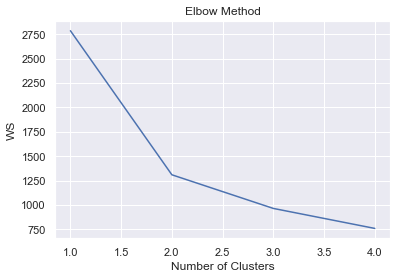

In [38]:
plt.plot(range(1,5), ws);
plt.title('Elbow Method');
plt.xlabel("Number of Clusters")
plt.ylabel("WS");

It seems we can choose 2 as number of clusters.

In [39]:
k_means = KMeans(n_clusters = 2)
k_means.fit(cc_z1)
labels = k_means.labels_

In [40]:
silhouette_score(cc_z1,labels)

0.4534933618223614

In [41]:
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
}

silhouette_coefficients = []

for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(cc_z1)
    score = silhouette_score(cc_z1,kmeans.labels_)
    silhouette_coefficients.append(score)

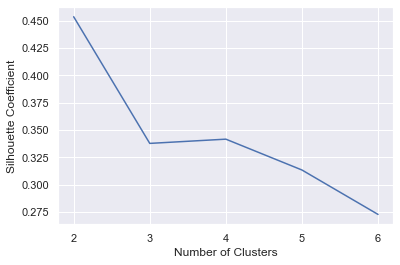

In [42]:
plt.plot(range(2, 7), silhouette_coefficients)
plt.xticks(range(2, 7))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [43]:
cc["cluster_K"] = labels
dfcopy['cluster_K']=labels
Kclus=cc
Kclus.head()

,mpg,cyl,disp,hp,wt,acc,yr,cluster_K
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [44]:
cc.cluster_K.value_counts().sort_index()

0    271
1    127
Name: cluster_K, dtype: int64

In [45]:
cc_z1["cluster_K"] = labels
cc_z1.head()

,mpg,cyl,disp,hp,wt,acc,yr,cluster_K
0,-0.706818,1.498191,1.090604,0.873924,0.630870,-1.403753,-1.627426,1
1,-1.095435,1.498191,1.503514,1.932244,0.854333,-1.604200,-1.627426,1
2,-0.706818,1.498191,1.196232,1.478678,0.550470,-1.804648,-1.627426,1
3,-0.965896,1.498191,1.061796,1.478678,0.546923,-1.403753,-1.627426,1
4,-0.836357,1.498191,1.042591,1.176301,0.565841,-2.005096,-1.627426,1


In [46]:
aggrdata=cc.iloc[:,0:8].groupby('cluster_K').mean()
aggrdata['Freq']=cc.cluster_K.value_counts().sort_index()
aggrdata

,mpg,cyl,disp,hp,wt,acc,yr,Freq
cluster_K,,,,,,,,
0,27.221241,4.439114,132.016605,83.372694,2496.564576,16.386375,76.977860,271
1,15.422835,7.622047,324.464567,138.921891,3981.574803,13.613434,73.944882,127


It seems two distinct groups with a difference in mean between the clusters and features.

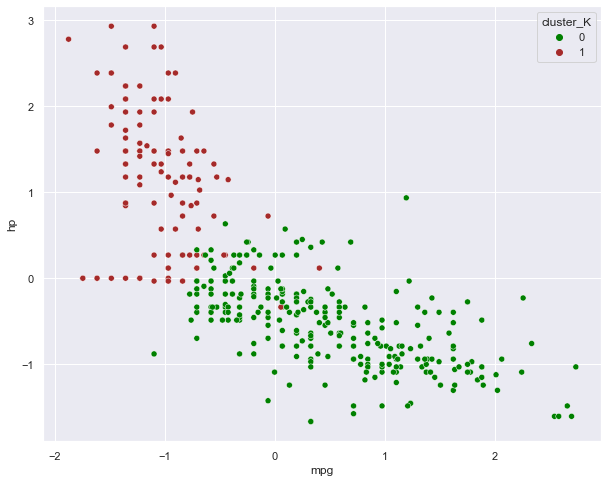

In [47]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x="mpg", y="hp", hue="cluster_K",
              data=cc_z1, 
                    palette=['green','brown']);

# Heirarchical Clustering

In [48]:
cc = dfnew.iloc[:,0:7] 
cc.head()

,mpg,cyl,disp,hp,wt,acc,yr
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [49]:
cc_z = cc.apply(zscore)
cc_z.head()

,mpg,cyl,disp,hp,wt,acc,yr
0,-0.706818,1.498191,1.090604,0.873924,0.630870,-1.403753,-1.627426
1,-1.095435,1.498191,1.503514,1.932244,0.854333,-1.604200,-1.627426
2,-0.706818,1.498191,1.196232,1.478678,0.550470,-1.804648,-1.627426
3,-0.965896,1.498191,1.061796,1.478678,0.546923,-1.403753,-1.627426
4,-0.836357,1.498191,1.042591,1.176301,0.565841,-2.005096,-1.627426


In [50]:
link_method = linkage(cc_z.iloc[:,0:7], method = 'average')

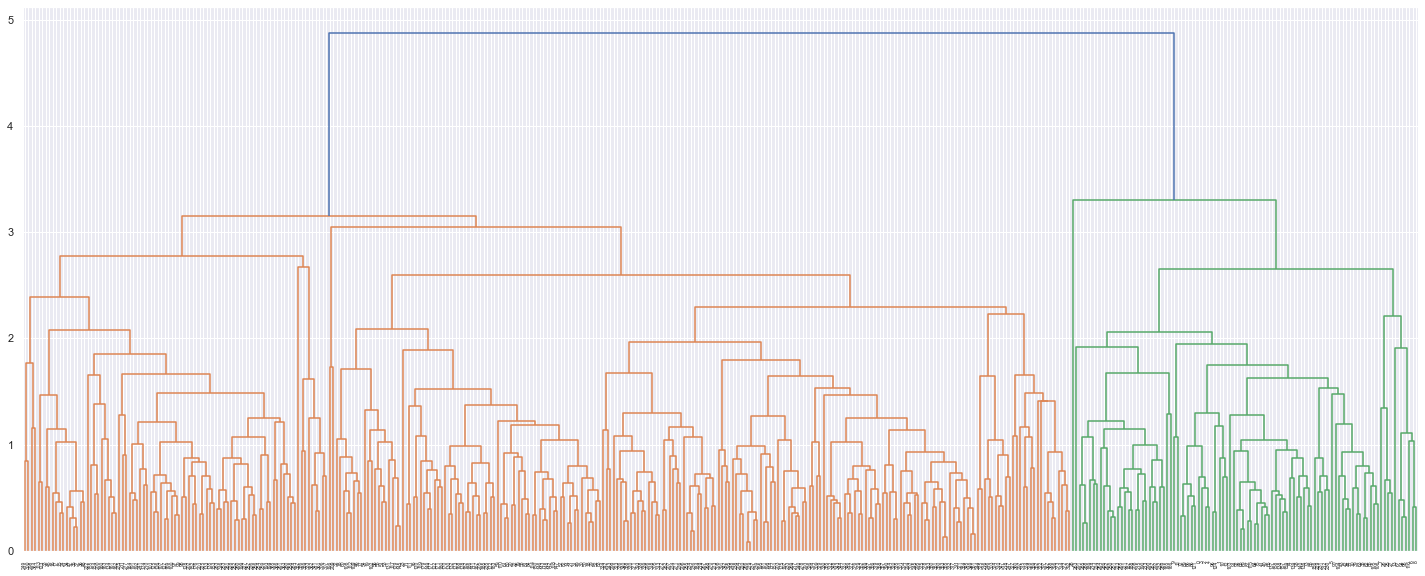

In [51]:
plt.figure(figsize=(25, 10))
dendrogram(link_method)
plt.show()

We will cut down this visually not analyzable dendogram to 2 clusters.

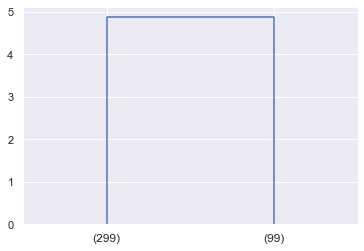

In [52]:
dendrogram(
    link_method,
    truncate_mode='lastp',  
    p=2,  
)
plt.show()

In [53]:
clusters = fcluster(link_method, 2, criterion='maxclust')
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,

In [54]:
cc_z['clusters_H'] = clusters
cc_z.head()

,mpg,cyl,disp,hp,wt,acc,yr,clusters_H
0,-0.706818,1.498191,1.090604,0.873924,0.630870,-1.403753,-1.627426,2
1,-1.095435,1.498191,1.503514,1.932244,0.854333,-1.604200,-1.627426,2
2,-0.706818,1.498191,1.196232,1.478678,0.550470,-1.804648,-1.627426,2
3,-0.965896,1.498191,1.061796,1.478678,0.546923,-1.403753,-1.627426,2
4,-0.836357,1.498191,1.042591,1.176301,0.565841,-2.005096,-1.627426,2


In [55]:
cc_z.clusters_H.value_counts().sort_index()

1    299
2     99
Name: clusters_H, dtype: int64

In [56]:
cc['clusters_H']=clusters
dfcopy['cluster_H']=clusters
cc.head()

,mpg,cyl,disp,hp,wt,acc,yr,clusters_H
0,18.0,8,307.0,130.0,3504,12.0,70,2
1,15.0,8,350.0,165.0,3693,11.5,70,2
2,18.0,8,318.0,150.0,3436,11.0,70,2
3,16.0,8,304.0,150.0,3433,12.0,70,2
4,17.0,8,302.0,140.0,3449,10.5,70,2


In [57]:
Hclus=cc
Hclus.head()

,mpg,cyl,disp,hp,wt,acc,yr,clusters_H
0,18.0,8,307.0,130.0,3504,12.0,70,2
1,15.0,8,350.0,165.0,3693,11.5,70,2
2,18.0,8,318.0,150.0,3436,11.0,70,2
3,16.0,8,304.0,150.0,3433,12.0,70,2
4,17.0,8,302.0,140.0,3449,10.5,70,2


In [58]:
aggrdata=cc.iloc[:,0:8].groupby('clusters_H').mean()
aggrdata['Freq']=cc.clusters_H.value_counts().sort_index()
aggrdata

,mpg,cyl,disp,hp,wt,acc,yr,Freq
clusters_H,,,,,,,,
1,26.378450,4.618729,142.797659,85.561873,2586.749164,16.365917,76.77592,299
2,14.631313,7.979798,346.333333,148.021011,4129.202020,12.890956,73.69697,99


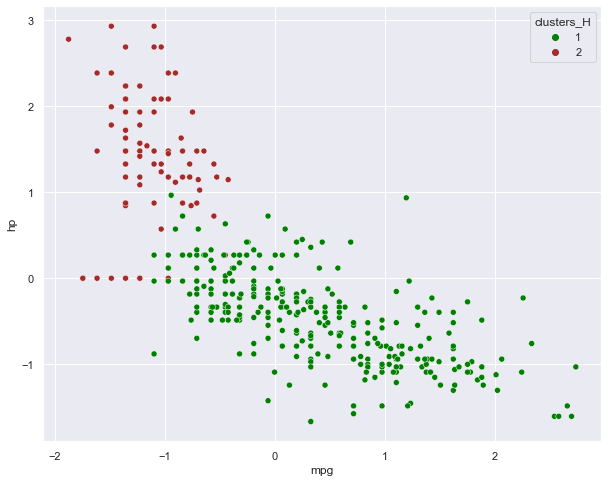

In [59]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x="mpg", y="hp", hue="clusters_H",
              data=cc_z, 
                    palette=['green','brown']);

In [60]:
dfcopy.cluster_H.value_counts().sort_index()

1    299
2     99
Name: cluster_H, dtype: int64

In [61]:
dfcopy.cluster_K.value_counts().sort_index()

0    271
1    127
Name: cluster_K, dtype: int64

### Both of K-means and Hierarchical methods seems to suggest that his data has 2 distinguishable clusters. Although number of points in each cluster vary as per method.

### Although hierarchical clustering shows multiple clusters in the first dendogram which suggests computively very costly method.

### Visual graphs of both methods shows few data points clusterwise entangled. But those are tolerable.

In [62]:
dfcopy.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin_1,origin_2,origin_3,mpg_level_high,mpg_level_low,mpg_level_medium,cluster_K,cluster_H
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0,0,0,1,1,2
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0,0,0,1,1,2
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0,0,0,1,1,2
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0,0,0,1,1,2
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0,0,0,1,1,2


In [63]:
df1 = dfcopy.copy()

# Linear regression on the original dataset

In [64]:
x = df1.drop(['mpg','origin_3','mpg_level_low','cluster_K','cluster_H'], axis=1)
y = df1[['mpg']]

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=15)

In [66]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression()

In [67]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is -0.49895162401791054
The coefficient for disp is 0.007961998176953193
The coefficient for hp is 0.009585355414158817
The coefficient for wt is -0.004772796761153476
The coefficient for acc is 0.18739701366974384
The coefficient for yr is 0.47112550813771903
The coefficient for origin_1 is -0.7799645036504169
The coefficient for origin_2 is 0.9317227632257625
The coefficient for mpg_level_high is 7.242070819077163
The coefficient for mpg_level_medium is 0.5596422368726726


In [68]:
intercept = regression_model.intercept_[0]
print("The intercept is {}".format(intercept))

The intercept is -2.624059347769361


In [69]:
regression_model.score(x_train, y_train)

0.8948435678216791

In [70]:
score=regression_model.score(x_test, y_test)
score

0.9018698137406003

# Linear regression on data with K means cluster

In [71]:
df1['cluster_K']=df1['cluster_K'].astype('category')
df1['cluster_K'] = df1['cluster_K'].replace({1: 'heavy', 0: 'light'})
df1 = pd.get_dummies(df1, columns=['cluster_K'])

In [72]:
df1.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin_1,origin_2,origin_3,mpg_level_high,mpg_level_low,mpg_level_medium,cluster_H,cluster_K_heavy,cluster_K_light
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0,0,0,1,2,1,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0,0,0,1,2,1,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0,0,0,1,2,1,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0,0,0,1,2,1,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0,0,0,1,2,1,0


In [73]:
X = df1.drop(['mpg','origin_3','mpg_level_low','cluster_K_light','cluster_H'], axis=1)
y = df1[['mpg']]

In [74]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [75]:
xegression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression()

In [76]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is -0.5496575815292176
The coefficient for disp is 0.012738511530548495
The coefficient for hp is -0.007631049622577104
The coefficient for wt is -0.0045348577030627345
The coefficient for acc is 0.08985465731868329
The coefficient for yr is 0.4599824137463504
The coefficient for origin_1 is -0.6581090195784329
The coefficient for origin_2 is 1.4671804797864128
The coefficient for mpg_level_high is 7.237821090669178
The coefficient for mpg_level_medium is 0.2848430709974694
The coefficient for cluster_K_heavy is -0.5559496439165732


In [77]:
intercept = regression_model.intercept_[0]
print("The intercep is {}".format(intercept))

The intercep is 0.5185719704018794


In [78]:
regression_model.score(x_train, y_train)

0.8956180949916498

In [79]:
scoreK=regression_model.score(x_test, y_test)
scoreK

0.898572354113162

In [80]:
df1.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin_1,origin_2,origin_3,mpg_level_high,mpg_level_low,mpg_level_medium,cluster_H,cluster_K_heavy,cluster_K_light
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0,0,0,1,2,1,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0,0,0,1,2,1,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0,0,0,1,2,1,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0,0,0,1,2,1,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0,0,0,1,2,1,0


# Linear regression on data with H-clusters 

In [81]:
df1['cluster_H']=df1['cluster_H'].astype('category')
df1['cluster_H'] = df1['cluster_H'].replace({1: 'heavy', 2: 'light'})
df1 = pd.get_dummies(df1, columns=['cluster_H'])

In [82]:
x = df1.drop(['mpg','origin_3','mpg_level_low','cluster_H_light','cluster_K_heavy','cluster_K_light'], axis=1)
y = df1[['mpg']]

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=10)

In [84]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression()

In [85]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is -0.921628181292224
The coefficient for disp is 0.013922100551640088
The coefficient for hp is -0.014482150940015958
The coefficient for wt is -0.0046493309634623526
The coefficient for acc is 0.11371555419221502
The coefficient for yr is 0.4750310371164229
The coefficient for origin_1 is -0.6553901713081449
The coefficient for origin_2 is 1.3969153145088196
The coefficient for mpg_level_high is 7.189201648750801
The coefficient for mpg_level_medium is 0.5189457640936624
The coefficient for cluster_H_heavy is -1.6635454473022906


In [86]:
intercept = regression_model.intercept_[0]
print("The intercept is {}".format(intercept))

The intercept is 2.783503508697219


In [87]:
regression_model.score(x_train, y_train)

0.8968071545962082

In [88]:
scoreH=regression_model.score(x_test, y_test)
scoreH

0.896734687818566

In [90]:
modellists = []
modellists.append(['Linear Regression on Original Data set', score*100])
modellists.append(['Linear Regression with K means clusters', scoreK*100])
modellists.append(['Linear Regression with Hierarchical clusters', scoreH*100])
mdl_df = pd.DataFrame(modellists, columns = ['Model','r^2 on Test'])
mdl_df

,Model,r^2 on Test
0,Linear Regression on Original Data set,90.186981
1,Linear Regression with K means clusters,89.857235
2,Linear Regression with Hierarchical clusters,89.673469


#### There is not much difference between the accuracies of all 3 Linear regressions.

#### To point out Linear regression on K means in shows very slightly but better results than Hierarchical clustering.

#### This dataset has 398 rows. It seems this dataset is very small. Smaller dataset mean model is not an example of machine learning.  

#### With bigger dataset and features like purpose of car use, owner's gender, engine type, etc can result into better model and better accuracies. 